In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [5]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

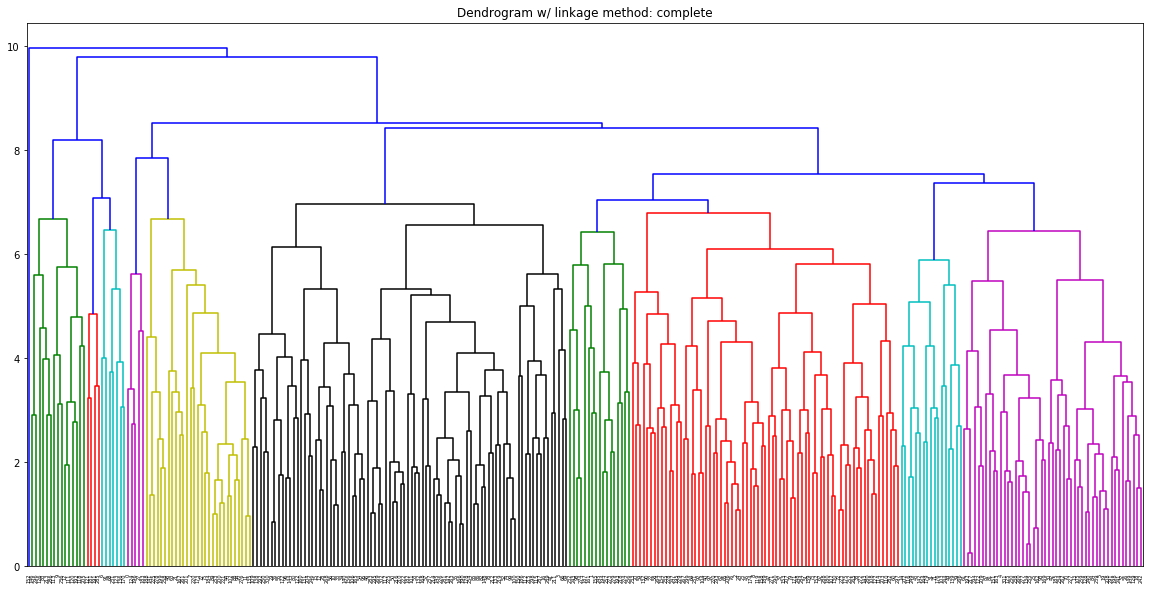

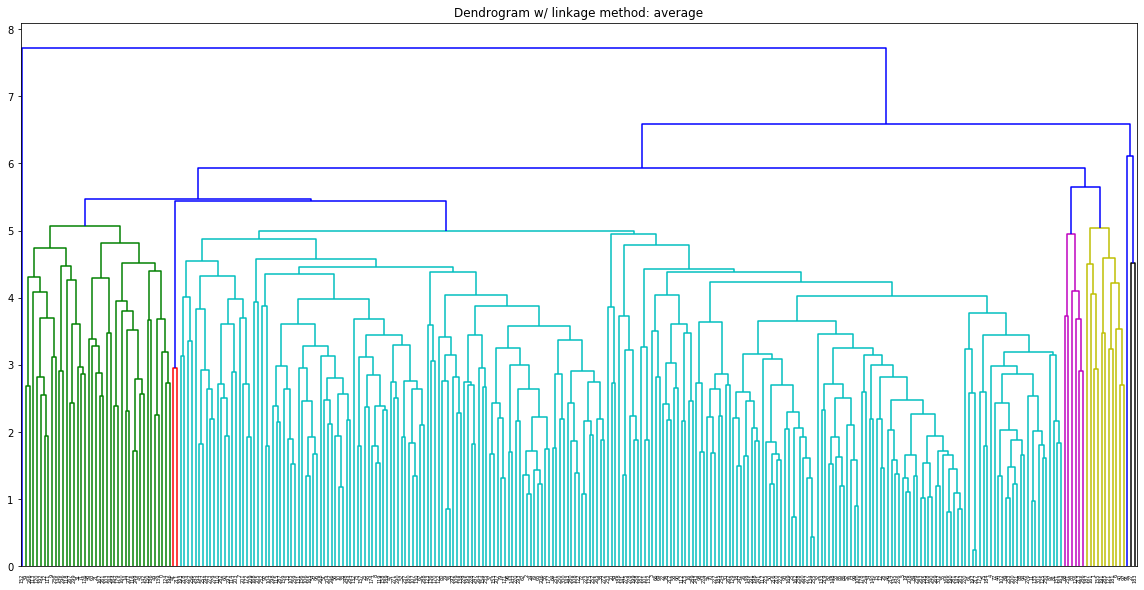

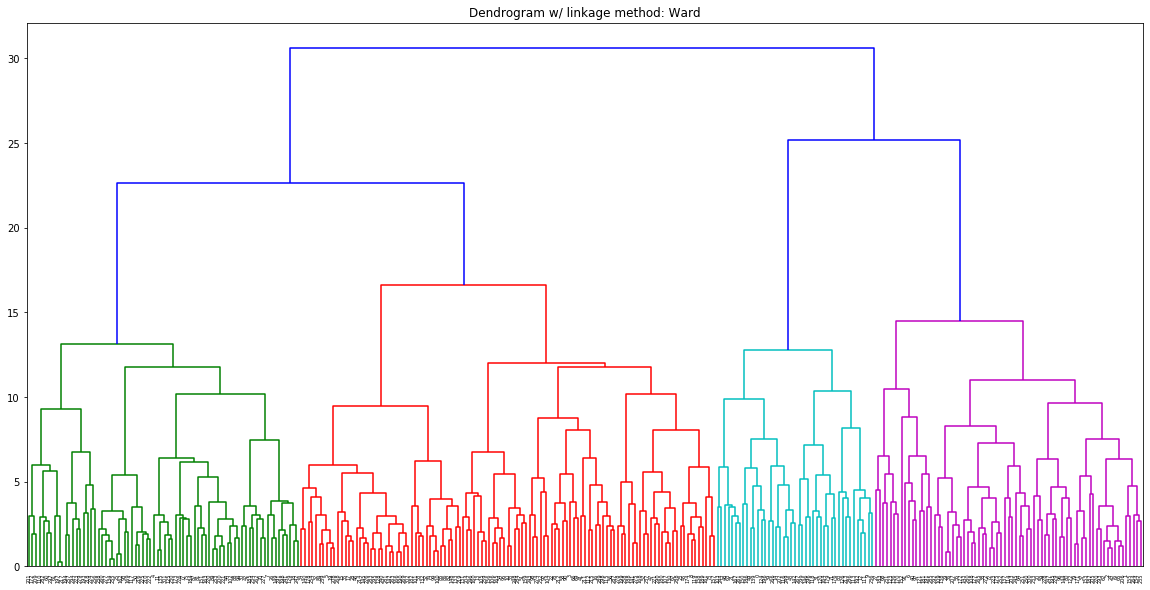

In [6]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram w/ linkage method: complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram w/ linkage method: average")
dendrogram(linkage(X_std, method='average'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram w/ linkage method: Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()

In [8]:
linkage_methods = ["ward", "average", "complete"]

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score-average: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score-average: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("\n")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score-complete: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score-complete: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("\n")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score-ward: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score-ward: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score-average: 0.2940490133353465
Silhouette score-average: 0.14837359969689895


ARI score-complete: 0.21394030618551016
Silhouette score-complete: 0.11730765444448985


ARI score-ward: 0.146129913123814
Silhouette score-ward: 0.1387197366557222
